In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Creating a data set

X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

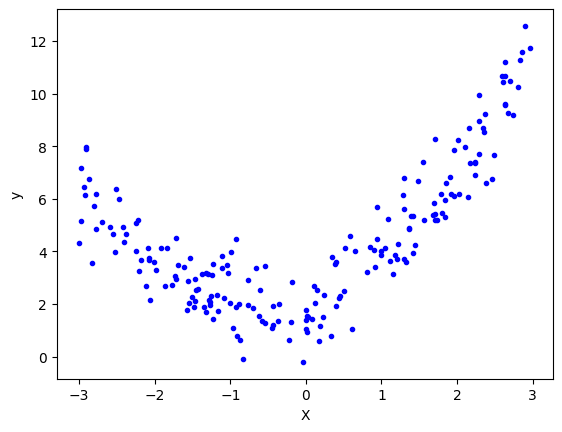

In [3]:
import matplotlib.pyplot as plt

plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X_train,Y_train)

LinearRegression()

In [8]:
y_pred = lr.predict(X_test)

In [9]:
from sklearn.metrics import r2_score

r2_score(Y_test,y_pred)

0.3741117523075588

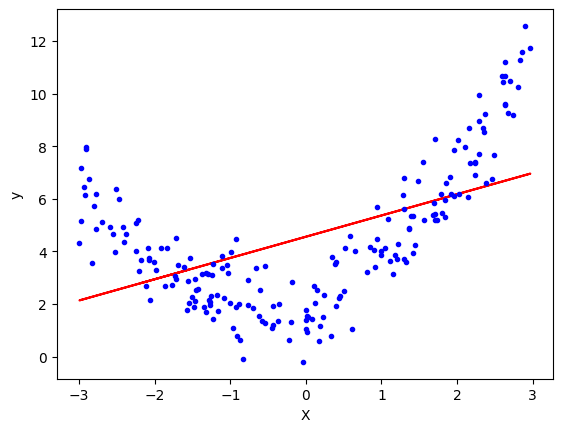

In [10]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [11]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [12]:
#Applying polynomial features

poly = PolynomialFeatures(degree=2,include_bias=True)   #degree 2

X_train_pol = poly.fit_transform(X_train)
X_test_pol = poly.transform(X_test)


In [13]:
print(X_train[0])
print(X_train_pol[0])

[-2.17961104]
[ 1.         -2.17961104  4.75070427]


In [14]:
lr = LinearRegression()
lr.fit(X_train_pol,Y_train)

LinearRegression()

In [15]:
y_pred = lr.predict(X_test_pol)

In [16]:
r2_score(y_pred,Y_test)

0.8382120787190422

In [17]:
#ploting graph

X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

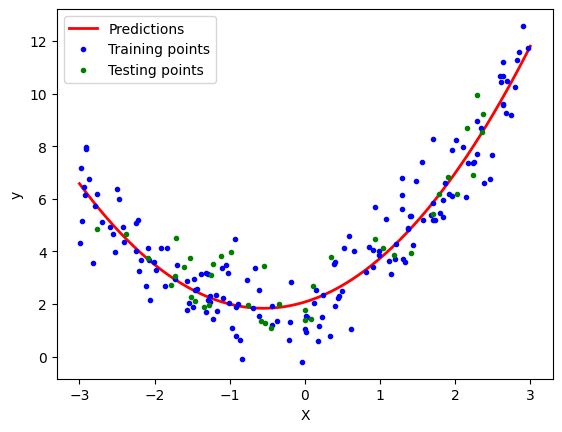

In [18]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, Y_train, "b.",label='Training points')
plt.plot(X_test, Y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()